In [1]:
import theano

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled)


In [2]:
import theano.tensor as T

In [16]:
x = T.scalar()

In [4]:
x

<TensorType(float32, scalar)>

In [66]:
y = 3*(x**2) + 1

In [6]:
type(y)

theano.tensor.var.TensorVariable

In [7]:
print(y)

Elemwise{add,no_inplace}.0


In [67]:
theano.pprint(y)

'((TensorConstant{3} * (<TensorType(float32, scalar)> ** TensorConstant{2})) + TensorConstant{1})'

In [68]:
theano.printing.debugprint(y)

Elemwise{add,no_inplace} [@A] ''   
 |Elemwise{mul,no_inplace} [@B] ''   
 | |TensorConstant{3} [@C]
 | |Elemwise{pow,no_inplace} [@D] ''   
 |   |<TensorType(float32, scalar)> [@E]
 |   |TensorConstant{2} [@F]
 |TensorConstant{1} [@G]


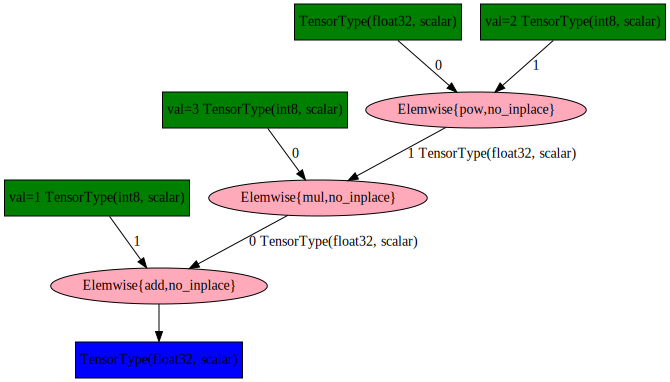

In [9]:
from IPython.display import SVG
SVG(theano.printing.pydotprint(y, return_image=True, format='svg'))

Supply a `dict` mapping variables to values

In [10]:
y.eval({x: 2})

array(13.0, dtype=float32)

Compile a function

In [11]:
f = theano.function([x], y)

In [12]:
f(2)

array(13.0, dtype=float32)

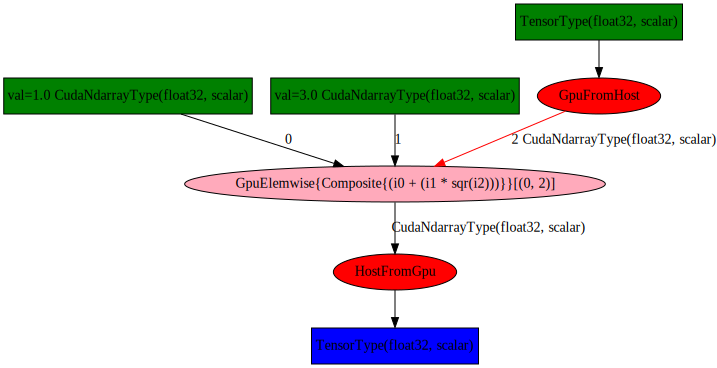

In [69]:
SVG(theano.printing.pydotprint(f, return_image=True, format='svg'))

In [19]:
X = T.vector()
X = T.matrix()
X = T.tensor3()
X = T.tensor4()

In [20]:
X = T.vector()

In [25]:
X[1:-1:2]

Subtensor{int64:int64:int64}.0

In [24]:
X[[1,2,3]]

AdvancedSubtensor1.0

Many functions/operations available through `theano.tensor` or variable methods

In [74]:
y = X.argmax()

In [76]:
y = T.cosh(X)

In [78]:
y = T.outer(X, X)

Don't try to use numpy functions on Theano variables!

# Shared Variables

- Symbolic + Storage

In [111]:
import numpy as np
x = theano.shared(np.zeros((2, 3), dtype=theano.config.floatX))

In [112]:
x

<CudaNdarrayType(float32, matrix)>

In [113]:
values = x.get_value()
print(values.shape)
print(values)

(2, 3)
[[ 0.  0.  0.]
 [ 0.  0.  0.]]


In [117]:
x.set_value(values)

In [118]:
(x + 2) ** 2

Elemwise{pow,no_inplace}.0

In [120]:
((x + 2) ** 2).eval()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]], dtype=float32)

In [122]:
theano.function([], (x + 2) ** 2)()

array([[ 4.,  4.,  4.],
       [ 4.,  4.,  4.]], dtype=float32)

# Updates

- Store results for function evalution
- `dict` mapping shared variables to new values